## 1. Finite impulse response (FIR) filters

Recall that a finite-impulse response filter is a discrete-time system with the following input-output relation:
$$
y[n] = \sum_{\ell=0}^{M} h_\ell x[n-\ell],~~~\forall n\in\mathbb{Z},
$$
where, $M$ is the *order* of the filter and $h_0,\ldots,h_M$ are the filter coefficients.

In particular, this is a **causal** FIR running average filter (Why?). 

Consider an FIR filter with input-ouput relation as follows:
$$
y[n] = \sum_{\ell=0}^{10} \big(6-|\ell-5|\big)\, x[n-\ell],~~~\forall n\in\mathbb{Z},
$$

<font color='red'>**Exercise 1.1** [1pts] </font> What are the filter coefficients? Create an 1D vector with the values of the filter coefficients. Use a for loop to do so. Do not forget to import the numpy package first!

In [1]:
import numpy as np                # Import necessary packages

M = 10
filter_coefficients = np.zeros(M+1)           # initialize an array of zeros of **appropriate length**
for ell in range(M+1) :
    filter_coefficients[ell] = 6-np.abs(ell-5)     # set the value of the \ell^{th} filter coefficients

Print the values of the array

In [2]:
print(filter_coefficients)

[1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1.]


<font color='red'>**Exercise 1.2** [1pts] </font> Generate a stem-plot of the **impulse responds of the filter.** 

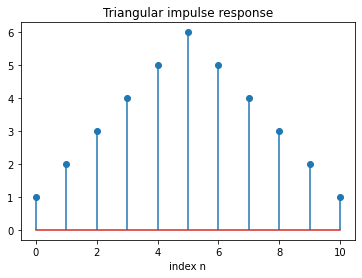

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

h = filter_coefficients            # impulse response array
h[0] = 1

plt.stem( range(0, M+1) , h )
plt.title('Triangular impulse response')
plt.xlabel('index n')
plt.show()

To better understand the functionality of FIR filter, let us compute the output $y[n]$ of the system for a particular input signal $x[n]$:

$$
x[n] = \begin{cases}
2 &, n=0,\\
4 &, n=1,\\
6 &, n=2,\\
0 &, n=3,\\
2 &, n=4,\\
0 &, \text{otherwise}\\
\end{cases}
$$

<font color='red'>**Exercise 1.3**</font> Compute the output of an FIR filter when $x[n]$ above is the input. We will walk you through this. So, follow the steps as indicated below.

<font color='red'>**Exercise 1.3.1** [1 pts]</font> Initialize the following variables.

In [4]:
# length of input signal x[n]
N = 5

# length of the output signal y[n]. First answer what is the support set of the output signal?
# The length of the output is the size of the support set plus one
L = N+M+1

<font color='red'>**Exercise 1.3.2** [2pts]</font> Initialize two 1-D arrays of length $N$ and $L$ each to store the values of the input and output signals, respectively. For the input signal, you already know the values that it takes. For the output signals just set all entries to zero for now. We will compute the correct entries subsequently.

In [5]:
x = np.array([2, 4, 6, 0, 2])
y = np.zeros(L)

Let us now make a [stem plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html) of the input signal $x[n]$.

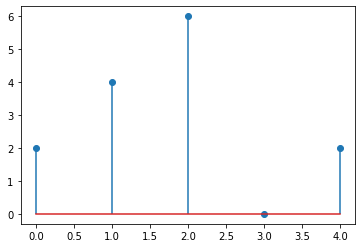

In [7]:
plt.stem( range(0, N) , x )
plt.show()

<font color='red'>**Exercise 1.3.3** [2pts]</font> Write Python code that computes the output signal $y[n]$. Also, make a stem plot of the output signal.

In [17]:
y = np.zeros(L)
for n in range(L):                         # n=0,1,....,L-1
    for ell in range(M+1):                   # ell=0,1,2,...,M-1 
        if (n-ell>=0 and n-ell<=N-1): 
            y[n] = y[n] + x[n-ell] * h[ell];    

The code above has two for-loops. 

The outer loop runs over all time indices $n$ for which we want to compute the value of $y[n]$. 

The inner loop runs over an the index $\ell$ of the summation that defines the input-output relation of the FIR filter:
$$
y[n] = \sum_{\ell=0}^{10} \big(6-|\ell-5|\big)\, x[n-\ell],~~~\forall n\in\mathbb{Z},
$$

In [22]:
h

array([1., 2., 3., 4., 5., 6., 5., 4., 3., 2., 1.])

[ 2.  8. 20. 32. 46. 60. 70. 72. 62. 52. 38. 24. 12.  4.  2.  0.]


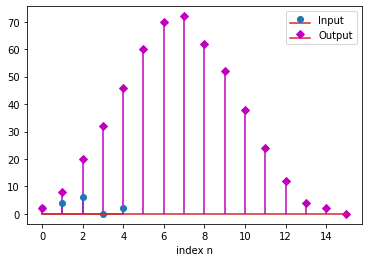

In [18]:
print(y)
plt.stem( range(0,N) , x , label='Input')
plt.stem( range(0,L) , y , 'm' , markerfmt='mD' , label='Output')
plt.xlabel('index n')
plt.legend()
plt.show()

### 1.1 FIR filter function

<font color='red'>**Exercise 1.4** [1pts]</font> Write a Python function that takes as arguments an input signal x of length $N$, an impulse response of length $M+1$ and computes the output $y$ (of length L=N+M) of a causal FIR filter of order $M$ with the specified impulse response.

In [29]:
def causal_FIR_Filter(x_in,h_FIR):
    # x_in: inptut signal 
    # h_FIR: impulse response of the FIR filter
    
    N = len(x_in)         # length of input signal. 
    M = len(h_FIR)-1      # order of the impulse response. Remember, by convention the order is equal to the length of the impulse response minus 1 
    
    L = N+M            # length of output
    y = np.zeros(L)    # initialize output
    
    for n in range(0,L):                  # n=0,1,....,L-1
        for ell in range(0,M+1):                # ell=0,1,...,M
            if (n-ell>=0 and n-ell<=N-1): 
                y[n] = y[n] + x[n-ell] * h[ell];    
    return y

<font color='red'>**Exercise 1.5** [1pts]</font> Test your function by calling it on the input signal and on the triangle impulse response you saw in the previous part. Plot the output and make sure that it looks the same as what you got in Exercise 1.3.3.

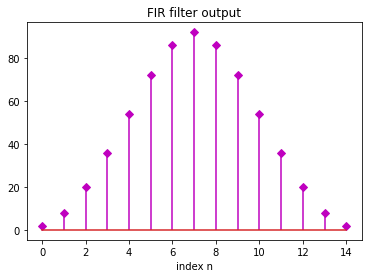

In [31]:
x = np.array([2,4,6,4,2]) # input signal from Exercise 1.3.2
h = filter_coefficients   # impulse response of filter in Exercise 1.2

plt.stem( range(len(h)+len(x)-1) , causal_FIR_Filter(x, h) , 'm' , markerfmt='mD')
plt.xlabel('index n')
plt.title('FIR filter output')
plt.show()

### 1.2 Convolution

Recall that we called the sum $\sum_{\ell=0}^{M} h_\ell x[n-\ell]$ a **convolution sum**. 
As we mentioned in class, convolution is a fundamental operation in signal-processing (and not only signal processing!). Not surprisingly, the Numpy package has a function called [`np.convolve`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) that performs convolution between two 1D signals.

<font color='red'>**Exercise 1.6** [1pts]</font> Call the convolution function of the numpy package on the input signal x and impulse response h of Exercise 1.1. Plot the output of the function and verify that it produces the same result as your function `causal_FIR_Filter`.

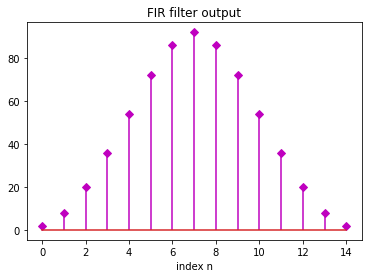

In [32]:
x = np.array([2,4,6,4,2]) # input signal from Exercise 1.3.2
h = filter_coefficients # impulse response of filter in Exercise 1.2

plt.stem( range(len(x)+len(h)-1) , np.convolve(x, h) , 'm' , markerfmt='mD')
plt.xlabel('index n')
plt.title('FIR filter output')
plt.show()

In [33]:
# Make sure these are the same!!!
print(causal_FIR_Filter(x,h))
print(np.convolve(x,h))
assert np.array_equal(causal_FIR_Filter(x,h), np.convolve(x,h)), "The arrays are not equal!"

[ 2.  8. 20. 36. 54. 72. 86. 92. 86. 72. 54. 36. 20.  8.  2.]
[ 2.  8. 20. 36. 54. 72. 86. 92. 86. 72. 54. 36. 20.  8.  2.]
